In [ ]:
# waterbody priority list from DEC:
# https://data.gis.ny.gov/datasets/nysdec::waterbody-inventory-priority-waterbodies-list-wi-pwl-layer/explore?layer=2&location=44.147372%2C-74.421511%2C9.23

In [38]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.errors import RasterioError

# Paths
geo_tiff_dir = "../geotiffs/"  # Directory containing your GeoTIFF files
shapefile_path = "../geotiffs/State_Shoreline.shp"  # Path to your shapefile
output_dir = "../masked_geotiffs/"  # Directory to save masked GeoTIFFs

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Load the shapefile using GeoPandas
gdf = gpd.read_file('../geotiffs/State_Shoreline.shp')
gdf = gdf.to_crs(epsg=4269)

# Iterate through all TIF files in the directory
for filename in os.listdir(geo_tiff_dir):
    if filename.endswith(".tif"):
        geo_tiff_path = os.path.join(geo_tiff_dir, filename)

        try:
            # Open the GeoTIFF
            with rasterio.open(geo_tiff_path) as src:
                # Attempt to mask the GeoTIFF with the shapefile geometry
                try:
                    out_image, out_transform = mask(src, gdf.geometry, crop=True)

                    # Check if the masked output is empty (entirely outside the shapefile boundary)
                    if out_image.size == 0:
                        print(f"{filename} is entirely outside the shapefile boundary. Skipping file.")
                        continue

                    # Check if the GeoTIFF was trimmed (partially intersected with the shapefile boundary)
                    trimmed = (
                        src.bounds.left < gdf.total_bounds[0] or
                        src.bounds.right > gdf.total_bounds[2] or
                        src.bounds.bottom < gdf.total_bounds[1] or
                        src.bounds.top > gdf.total_bounds[3]
                    )
                    if trimmed:
                        print(f"{filename} was trimmed to fit the shapefile boundary.")
                    else:
                        print(f"{filename} fits entirely within the shapefile boundary (not trimmed).")

                    # Update metadata for the cropped GeoTIFF
                    out_meta = src.meta.copy()
                    out_meta.update({
                        "driver": "GTiff",
                        "height": out_image.shape[1],
                        "width": out_image.shape[2],
                        "transform": out_transform
                    })

                    # Save the masked GeoTIFF
                    output_path = os.path.join(output_dir, f"masked_{filename}")
                    with rasterio.open(output_path, "w", **out_meta) as dest:
                        dest.write(out_image)
                    
                    print(f"Processed and saved {filename} to {output_path}")

                except ValueError as e:
                    # Handle errors related to masking (e.g., no intersection with shapefile)
                    print(f"Error masking {filename}: {e}. Skipping file.")

        except RasterioError as e:
            # Handle errors related to opening the GeoTIFF
            print(f"Error opening {filename}: {e}. Skipping file.")

print("Processing completed!")


Error masking USGS_1_n40w075_20210624.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_1_n40w076_20220524.tif: Input shapes do not overlap raster.. Skipping file.
USGS_1_n41w073_20151214.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n41w073_20151214.tif to ../masked_geotiffs/masked_USGS_1_n41w073_20151214.tif
USGS_1_n41w074_20240925.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n41w074_20240925.tif to ../masked_geotiffs/masked_USGS_1_n41w074_20240925.tif
USGS_1_n41w075_20221115.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n41w075_20221115.tif to ../masked_geotiffs/masked_USGS_1_n41w075_20221115.tif
USGS_1_n41w076_20221115.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n41w076_20221115.tif to ../masked_geotiffs/masked_USGS_1_n41w076_20221115.tif
Error masking USGS_1_n42w070_20230117.tif: Input shapes do not overlap raster.. Skipping file.
Error maski

USGS_1_n46w075_20180322.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n46w075_20180322.tif to ../masked_geotiffs/masked_USGS_1_n46w075_20180322.tif
USGS_1_n46w076_20130911.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n46w076_20130911.tif to ../masked_geotiffs/masked_USGS_1_n46w076_20130911.tif
USGS_1_n46w077_20130911.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n46w077_20130911.tif to ../masked_geotiffs/masked_USGS_1_n46w077_20130911.tif
USGS_1_n46w078_20130911.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_1_n46w078_20130911.tif to ../masked_geotiffs/masked_USGS_1_n46w078_20130911.tif
Error masking USGS_1_n47w072_20130911.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_1_n47w073_20130911.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_1_n47w074_20130911.tif: Input shapes do not overlap raster.. Skipping file.
Processing 

In [40]:
import os
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.errors import RasterioError

# Paths
geo_tiff_dir = "../geotiffs_adk/"  # Directory containing your GeoTIFF files
output_dir = "../masked_adk_geotiffs/"  # Directory to save masked GeoTIFFs

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Load the shapefile using GeoPandas
gdf = gpd.read_file('../geotiffs/cugir-007739/blueline.shp')
gdf = gdf.to_crs(epsg=4269)

# Iterate through all TIF files in the directory
for filename in os.listdir(geo_tiff_dir):
    if filename.endswith(".tif"):
        geo_tiff_path = os.path.join(geo_tiff_dir, filename)

        try:
            # Open the GeoTIFF
            with rasterio.open(geo_tiff_path) as src:
                # Attempt to mask the GeoTIFF with the shapefile geometry
                try:
                    out_image, out_transform = mask(src, gdf.geometry, crop=True)

                    # Check if the masked output is empty (entirely outside the shapefile boundary)
                    if out_image.size == 0:
                        print(f"{filename} is entirely outside the shapefile boundary. Skipping file.")
                        continue

                    # Check if the GeoTIFF was trimmed (partially intersected with the shapefile boundary)
                    trimmed = (
                        src.bounds.left < gdf.total_bounds[0] or
                        src.bounds.right > gdf.total_bounds[2] or
                        src.bounds.bottom < gdf.total_bounds[1] or
                        src.bounds.top > gdf.total_bounds[3]
                    )
                    if trimmed:
                        print(f"{filename} was trimmed to fit the shapefile boundary.")
                    else:
                        print(f"{filename} fits entirely within the shapefile boundary (not trimmed).")

                    # Update metadata for the cropped GeoTIFF
                    out_meta = src.meta.copy()
                    out_meta.update({
                        "driver": "GTiff",
                        "height": out_image.shape[1],
                        "width": out_image.shape[2],
                        "transform": out_transform
                    })

                    # Save the masked GeoTIFF
                    output_path = os.path.join(output_dir, f"masked_{filename}")
                    with rasterio.open(output_path, "w", **out_meta) as dest:
                        dest.write(out_image)
                    
                    print(f"Processed and saved {filename} to {output_path}")

                except ValueError as e:
                    # Handle errors related to masking (e.g., no intersection with shapefile)
                    print(f"Error masking {filename}: {e}. Skipping file.")

        except RasterioError as e:
            # Handle errors related to opening the GeoTIFF
            print(f"Error opening {filename}: {e}. Skipping file.")

print("Processing completed!")


Error masking USGS_13_n43w073_20230117.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_13_n43w074_20241010.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_13_n43w075_20241010.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_13_n43w076_20230227.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_13_n43w077_20230227.tif: Input shapes do not overlap raster.. Skipping file.
Error masking USGS_13_n44w073_20181204.tif: Input shapes do not overlap raster.. Skipping file.
USGS_13_n44w074_20241010.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_13_n44w074_20241010.tif to ../masked_adk_geotiffs/masked_USGS_13_n44w074_20241010.tif
USGS_13_n44w075_20241010.tif was trimmed to fit the shapefile boundary.
Processed and saved USGS_13_n44w075_20241010.tif to ../masked_adk_geotiffs/masked_USGS_13_n44w075_20241010.tif
USGS_13_n44w076_20241010.tif was trimmed to fit the shapef

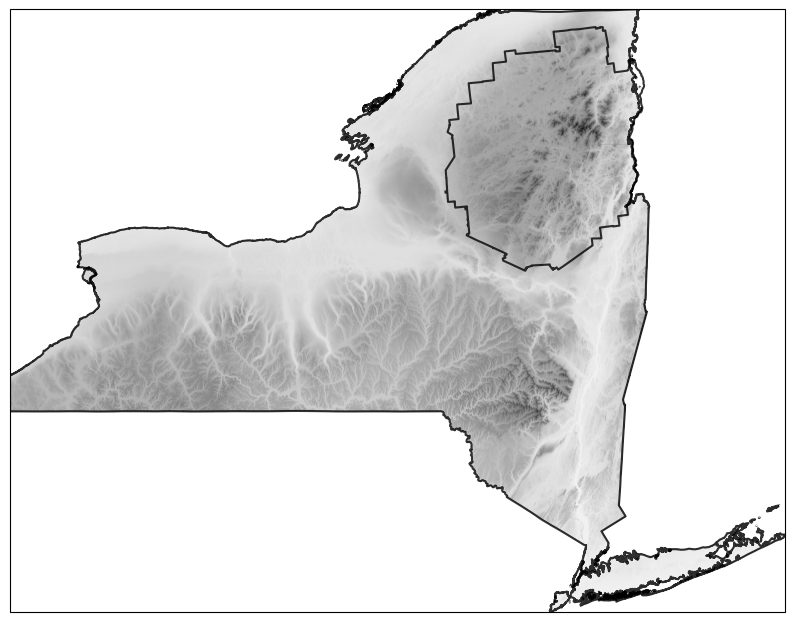

In [1]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import shapefile  # Install with pip install pyshp
from cartopy.feature import ShapelyFeature
import geopandas as gpd

# Directory containing GeoTIFF files
geo_tiff_dir = "../masked_geotiffs/"


# Iterate through all files in the directory
geo_tiff_files = [os.path.join(geo_tiff_dir, f) for f in os.listdir(geo_tiff_dir) if f.endswith(".tif")]

# Initialize variables to track the maximum extent
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')
global_min, global_max = float('inf'), float('-inf')

# First pass: Compute the maximum extent across all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        try:
            # Update the bounds
            min_x = min(min_x, src.bounds.left)
            max_x = max(max_x, src.bounds.right)
            min_y = min(min_y, src.bounds.bottom)
            max_y = max(max_y, src.bounds.top)

            # Compute global min and max elevation values
            data = src.read(1)
            data = data[data != src.nodata]  # Exclude nodata values
            #data = abs(data)**(1/1.12)
            global_min = min(global_min, np.min(data))
            global_max = max(global_max, np.max(data))
        except:
            pass

# Create a Cartopy plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
#ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
#ax.add_feature(cfeature.COASTLINE, alpha=0.5)
#ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Set the computed maximum extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.PlateCarree())

# Second pass: Plot all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        try:
            # Read the first band
            data = src.read(1)
            data[data == src.nodata] = np.nan  # Mask nodata values
            # Get the extent of the GeoTIFF
            extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
            # Plot the GeoTIFF
            ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, 
                      origin='upper', cmap='binary', 
                      vmin=global_min, vmax=global_max, alpha=1)
        except:
            pass
        
gdf = gpd.read_file('../geotiffs/cugir-007739/blueline.shp')
gdf = gdf.to_crs(epsg=4269)
gdf.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=1.5, alpha = 0.8)

gdf1 = gpd.read_file('../geotiffs/State_Shoreline.shp')
gdf1 = gdf1.to_crs(epsg=4269)
gdf1.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=1.5, alpha = 0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add title
plt.savefig("../geotiffs/NYSTATE.pdf", dpi = 600, bbox_inches='tight')
plt.show()

In [ ]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import shapefile  # Install with pip install pyshp
from cartopy.feature import ShapelyFeature
import geopandas as gpd
from adjustText import adjust_text

# Directory containing GeoTIFF files
geo_tiff_dir = "../masked_adk_geotiffs/"


# Iterate through all files in the directory
geo_tiff_files = [os.path.join(geo_tiff_dir, f) for f in os.listdir(geo_tiff_dir) if f.endswith(".tif")]

# Initialize variables to track the maximum extent
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')
global_min, global_max = float('inf'), float('-inf')
global_min_value = float("inf")
global_min_coords = None
global_min_file = None

# First pass: Compute the maximum extent across all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Update the bounds
        min_x = min(min_x, src.bounds.left)
        max_x = max(max_x, src.bounds.right)
        min_y = min(min_y, src.bounds.bottom)
        max_y = max(max_y, src.bounds.top)
        
        # Compute global min and max elevation values
        data = src.read(1)
        nodata = src.nodata
        if nodata is not None:
            data = np.ma.masked_equal(data, nodata)

        # Ensure the data has valid values
        if np.ma.is_masked(data) and np.all(data.mask):
            print(f"No valid data in file: {geo_tiff}")
            continue  # Skip this file

        # Find the minimum value and its index in the current file
        min_index = np.unravel_index(np.argmin(data), data.shape)
        min_value = data[min_index]

        # Update global tracking if this file has the lowest value
        if min_value < global_min_value:
            global_min_value = min_value
            global_min_coords = rasterio.transform.xy(src.transform, min_index[0], min_index[1], offset="center")
            global_min_file = geo_tiff
        data = data[data != src.nodata]  # Exclude nodata values
        #data = abs(data)**(1/1.09)
        global_min = min(global_min, np.min(data))
        global_max = max(global_max, np.max(data))

# Create a Cartopy plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
#ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
#ax.add_feature(cfeature.COASTLINE, alpha=0.5)
#ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Set the computed maximum extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.PlateCarree())

# Second pass: Plot all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Read the first band
        data = src.read(1)
        
        data[data == src.nodata] = np.nan  # Mask nodata values
        # Get the extent of the GeoTIFF
        extent = [src.bounds.left, src.bounds.right, 
                  src.bounds.bottom, src.bounds.top]
        # Plot the GeoTIFF
        ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, 
                  origin='upper', cmap=custom_cmap, 
                  vmin=global_min, vmax=global_max, alpha=1)
        
gdf2 = gpd.read_file('../geotiffs/cugir-007739/blueline.shp')
gdf2 = gdf2.to_crs(epsg=4269)
gdf2.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=1.5, alpha = 0.8)

gdf1 = gpd.read_file('../geotiffs/Priority_Waterbody_List_-_Lakes.shp')
gdf1 = gdf1.to_crs(epsg=4269)
mask = gdf2.unary_union  # Create a single boundary geometry
gdf1_clipped = gpd.clip(gdf1, mask)
#gdf1_filtered = gdf1[gdf1.geometry.apply(lambda geom: boundary.contains(geom))]
gdf1_clipped.plot(ax=ax, facecolor="#1E4D8B", alpha = 1)
#gdf1.plot(ax=ax, facecolor="#1E4D8B", alpha = 1)

x_coords = [float(i) for i in meta["Longitude"].tolist()]
y_coords = [float(i) for i in meta["Latitude"].tolist()]
labels = meta["Full name"].tolist()

ax.scatter(x_coords, 
           y_coords, 
           marker=7, 
        color='cyan', s=40, alpha=0.7, transform=ccrs.PlateCarree())

texts = []
for x, y, label in zip(x_coords, 
                       y_coords, 
                       labels):
    texts.append(plt.text(x, y, label, fontsize=10, color="white",
                          ha='right', va='top', transform=ccrs.PlateCarree(), 
                          bbox=dict(facecolor="grey", alpha=0.5, edgecolor="none")))

adjust_text(
    texts, 
#    x=x_coords, 
#    y=y_coords, 
#    force_text=30.0,  # High repulsion force
#    force_points=30.0,  # High force from points
#    expand_text=(1.5, 2.0),
#    expand_points=(1.5, 2.0),
#    offset_text=True,  # Enable text offsetting
    arrowprops=dict(arrowstyle="->", color="black", lw=1)  # Draw connecting arrows
)

# Add title
plt.title("Overlay of GeoTIFF Files")
plt.savefig("../geotiffs/test_adk.pdf", dpi = 600, bbox_inches='tight')
plt.show()

/tmp/ipykernel_1086614/112715195.py:94: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  mask = gdf2.unary_union  # Create a single boundary geometry


In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Sample GPS points and labels
gps_points = [
    {"name": "Point A", "x": -74.1, "y": 43.5},
    {"name": "Point B", "x": -74.15, "y": 43.52},
    {"name": "Point C", "x": -74.13, "y": 43.55},
    {"name": "Point D", "x": -74.12, "y": 43.53},
    {"name": "Point E", "x": -74.11, "y": 43.51},
]

# Extract coordinates and names
x_coords = [p["x"] for p in gps_points]
y_coords = [p["y"] for p in gps_points]
labels = [p["name"] for p in gps_points]

# Create a plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_coords, y_coords, color="blue", label="GPS Points")

# Add text labels at the points with semi-transparent boxes
texts = []
for x, y, label in zip(x_coords, y_coords, labels):
    texts.append(
        plt.text(
            x, y, label, fontsize=10, color="darkgreen",
            bbox=dict(facecolor="white", alpha=0.5, edgecolor="none")  # Semi-transparent box
        )
    )

# Use adjustText to avoid overlapping labels
adjust_text(
    texts,
    x=x_coords,
    y=y_coords,
    arrowprops=dict(arrowstyle="->", color="red", lw=0.5)  # Draw connecting arrows
)

# Customize plot
ax.set_title("GPS Points with Non-Overlapping Labels and Background Boxes")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
color_list = ["#87b08e", "#225c29", "#526b30", "#87a362", "#A9A9A9"]

from matplotlib.colors import to_rgba
from matplotlib.colors import LinearSegmentedColormap
def create_custom_colormap(color_list, cutoff=0.9):
    """
    Create a colormap where the bottom `cutoff` proportion ramps between low_color and high_color,
    and the top 1 - `cutoff` is assigned a fixed color.
    """
    n = 256  # Number of color entries
    cutoff_index = int(n * cutoff)  # Index where the top color starts
    colors = np.zeros((n, 4))  # RGBA colormap

    # Create a gradient between low_color and high_color for the first `cutoff` portion
    ramp = LinearSegmentedColormap.from_list("ramp", color_list[0:-1], N=cutoff_index)
    colors[:cutoff_index] = ramp(np.linspace(0, 1, cutoff_index))

    # Set the top color for the remaining portion
    colors[cutoff_index:] = to_rgba(color_list[-1])  # Fixed top color

    return LinearSegmentedColormap.from_list("custom_colormap", colors)

# Step 3: Create and use the custom colormap
custom_cmap = create_custom_colormap(color_list, cutoff = (global_max - ((5343/6.08186) - (4700/6.08186))) / global_max)

In [8]:
import pandas as pd

In [9]:
meta = pd.read_csv("../master_metadata.csv")
meta = meta[meta["Notes"] != "Strange coordinate"].reset_index(drop=True)
meta = meta[meta["Latitude"].notna()].sort_values("Latitude", ascending = True).drop_duplicates("Name", keep = "last").reset_index(drop=True)

In [27]:
meta = pd.read_csv("../master_metadata.csv")


In [32]:
meta["tmp"] = meta["Season"] + meta["Site"] + meta["Description"]

In [35]:
(meta[meta["tmp"].duplicated()][meta["Replicate"].notna()].sort_values(["Name", "Season", "Site", "Description", "Replicate"])).head()

/tmp/ipykernel_1086614/2467557657.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (meta[meta["tmp"].duplicated()][meta["Replicate"].notna()].sort_values(["Name", "Season", "Site", "Description", "Replicate"]))


,Name,Full name,Date,Season,ALSC,Time,Site,Description,EGCF-ID,Replicate,...,Longitude,Water Depth,eDNA,Vol. Filtered (ml),eDNA Depth (m),Temp at Depth,DO at Depth,Secchi Depth (M),Notes,tmp
175,Dart Lake,Dart Lake,9/22/2023,Early Fall,0,13:17,1,Deep,299,1,...,-74.87041,11.5,x,150.0,9.0,9.1,5.0,3.6,NaN,Early Fall1Deep
176,Dart Lake,Dart Lake,9/22/2023,Early Fall,0,13:22,1,Deep,300,2,...,-74.87041,11.5,x,150.0,9.0,9.1,5.0,3.6,NaN,Early Fall1Deep
173,Dart Lake,Dart Lake,9/22/2023,Early Fall,0,13:10,1,Surface,297,1,...,-74.87041,11.5,x,150.0,0.0,19.3,8.6,3.6,NaN,Early Fall1Surface
174,Dart Lake,Dart Lake,9/22/2023,Early Fall,0,13:13,1,Surface,298,2,...,-74.87041,11.5,x,150.0,0.0,19.3,8.6,3.6,NaN,Early Fall1Surface
127,Dart Lake,Dart Lake,9/22/2023,Early Fall,0,1320,1A,Near Shore,295,1,...,-7486954,1.5,x,150.0,0.0,19.3,8.6,3.6,Strange coordinate,Early Fall1ANear Shore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Upper Cascade,Upper Cascade Lake,6/12/2023,Spring,0,11:32,5,Deep,121,1,...,-73.8756,11.4,x,150.0,8.0,8.7,9.9,6.5,NaN,Spring5Deep
65,Upper Cascade,Upper Cascade Lake,6/12/2023,Spring,0,11:22,5,Surface,123,1,...,-73.8756,11.4,x,150.0,0.0,15.6,9.3,6.5,NaN,Spring5Surface
68,Upper Cascade,Upper Cascade Lake,6/12/2023,Spring,0,11:10,5A,Near Shore,122,1,...,-73.8747,2.0,x,150.0,0.0,15.6,9.3,6.5,NaN,Spring5ANear Shore
365,Upper Cascade,Upper Cascade Lake,6/12/2023,Spring,0,1200,Blank,Blank,137,1,...,NaN,NaN,x,150.0,NaN,NaN,NaN,NaN,NaN,SpringBlankBlank


In [ ]:
# Create a Cartopy plot
fig, ax = plt.subplots(figsize=(10, 10), 
                       subplot_kw={'projection': ccrs.InterruptedGoodeHomolosine()})


# Set the computed maximum extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.InterruptedGoodeHomolosine())
#ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
#ax.add_feature(cfeature.COASTLINE, alpha=0.5)
#ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Second pass: Plot all GeoTIFFs with consistent color scaling
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Read the first band
        data = src.read(1)
        data[data == src.nodata] = np.nan  # Mask nodata values
        # Get the extent of the GeoTIFF
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        # Plot the GeoTIFF with global scaling
        ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, origin='upper',
                  cmap='viridis', vmin=global_min, vmax=global_max, alpha=1)

#ax.coastlines()
#gdf = gpd.read_file('../geotiffs/AdirondackParkBoundary2017.shp')
#gdf = gdf.to_crs(epsg=4269)
#gdf.plot(ax=ax, color='blue', linewidth=1)

# Add base map features

# Add title
plt.savefig("../geotiffs/test.pdf", dpi=900, bbox_inches='tight')
plt.show()


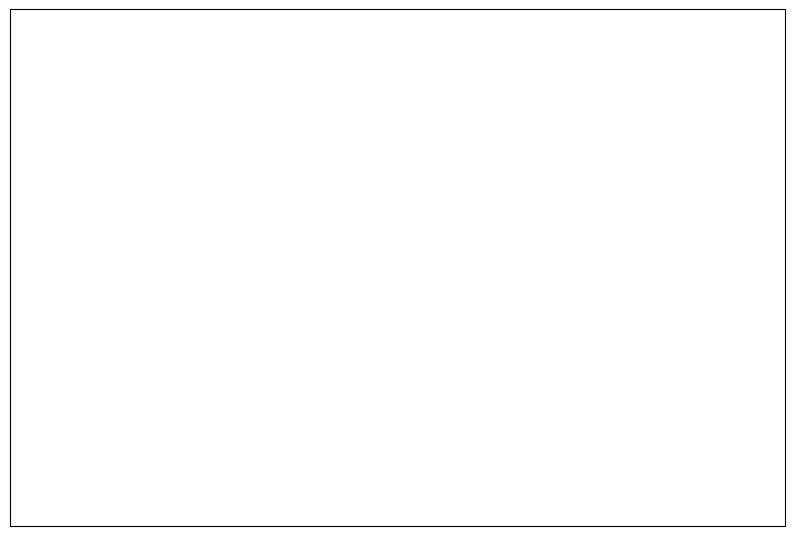

In [67]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import shapefile  # Install with pip install pyshp
from cartopy.feature import ShapelyFeature
import geopandas as gpd

# Directory containing GeoTIFF files
geo_tiff_dir = "../geotiffs/"

# Iterate through all files in the directory
geo_tiff_files = [os.path.join(geo_tiff_dir, f) for f in os.listdir(geo_tiff_dir) if f.endswith(".tif")]

# Initialize variables to track the maximum extent and global elevation range
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')
global_min, global_max = float('inf'), float('-inf')

# First pass: Compute the maximum extent and global elevation range
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Update the bounds
        min_x = min(min_x, src.bounds.left)
        max_x = max(max_x, src.bounds.right)
        min_y = min(min_y, src.bounds.bottom)
        max_y = max(max_y, src.bounds.top)
        
        # Compute global min and max elevation values
        data = src.read(1)
        data = data[data != src.nodata]  # Exclude nodata values
        data = abs(data)**(1/1.12)
        global_min = min(global_min, np.min(data))
        global_max = max(global_max, np.max(data))

# Create a Cartopy plot
fig, ax = plt.subplots(figsize=(10, 10), 
                       subplot_kw={'projection': ccrs.InterruptedGoodeHomolosine()})


# Set the computed maximum extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.InterruptedGoodeHomolosine())
#ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
#ax.add_feature(cfeature.COASTLINE, alpha=0.5)
#ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Second pass: Plot all GeoTIFFs with consistent color scaling
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Read the first band
        data = src.read(1)
        data[data == src.nodata] = np.nan  # Mask nodata values
        # Get the extent of the GeoTIFF
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        # Plot the GeoTIFF with global scaling
        ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, origin='upper',
                  cmap='viridis', vmin=global_min, vmax=global_max, alpha=1)

#ax.coastlines()
#gdf = gpd.read_file('../geotiffs/AdirondackParkBoundary2017.shp')
#gdf = gdf.to_crs(epsg=4269)
#gdf.plot(ax=ax, color='blue', linewidth=1)

# Add base map features

# Add title
plt.savefig("../geotiffs/test.pdf", dpi=900, bbox_inches='tight')
plt.show()


TypeError: Invalid shape (1, 28812, 43212) for image data

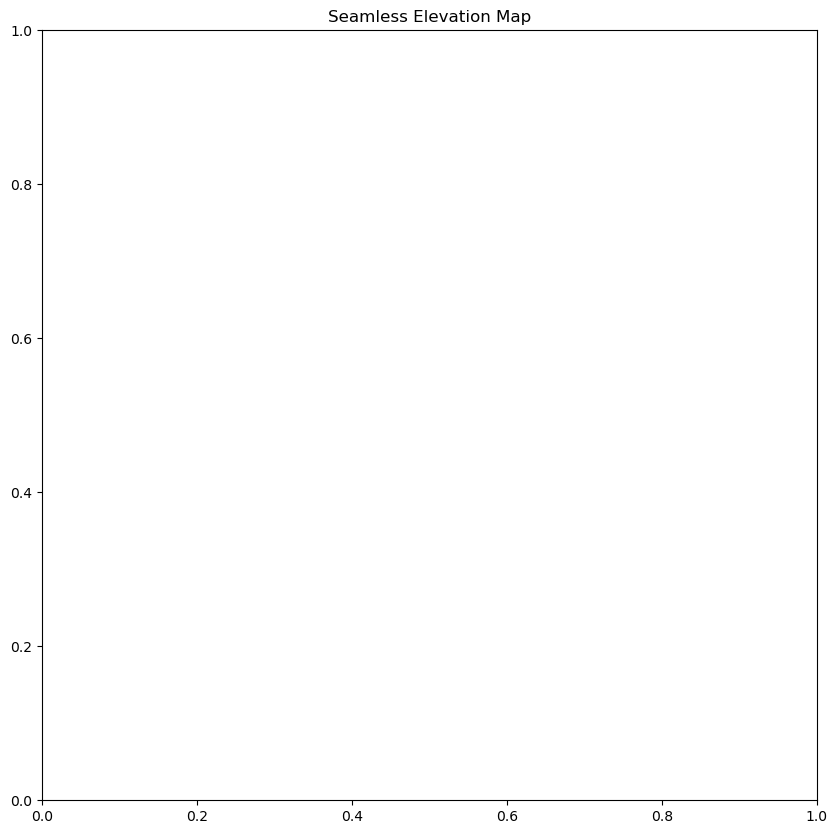

In [4]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt
import glob

# Step 1: Read and merge the GeoTIFF tiles
def merge_tiles(tile_paths):
    src_files_to_mosaic = []
    for fp in tile_paths:
        src = rasterio.open(fp)
        src_files_to_mosaic.append(src)

    # Merge the tiles
    mosaic, out_transform = merge(src_files_to_mosaic)

    # Update the metadata
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_transform,
    })
    
    return mosaic, out_meta

# Step 2: Gather all the GeoTIFF files
tile_folder = "../geotiffs/"  # Update with your folder
tile_paths = glob.glob(f"{tile_folder}/*.tif")

# Merge the tiles
mosaic, out_meta = merge_tiles(tile_paths)

# Step 3: Plot the merged data
plt.figure(figsize=(10, 10))
plt.title("Seamless Elevation Map")
#show(mosaic, cmap="terrain")  # Use a colormap of your choice
ax.imshow(mosaic, transform=ccrs.PlateCarree(), extent=extent, origin='upper', cmap='terrain', alpha=0.7)
plt.colorbar(label="Elevation (m)")
plt.show()


In [5]:
%%bash
source ~/.bashrc
conda activate mapping
gdalbuildvrt ../geotiffs/mosaic.vrt ../geotiffs/*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
from rasterio.enums import Resampling
import rasterio
import matplotlib.pyplot as plt
from rasterio.windows import Window
import cartopy.crs as ccrs

# Open the virtual raster
with rasterio.open("../geotiffs/mosaic.vrt") as src:
    # Read the data with downsampling
    downsample_factor = 1  # Adjust as needed
    data = src.read(
        1,
        out_shape=(
            int(src.height / downsample_factor),
            int(src.width / downsample_factor),
        ),
        resampling=Resampling.average,
    )
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[1]), (src.height / data.shape[0])
    )

# Plot the downsampled data
fig, ax = plt.subplots(
    subplot_kw={"projection": ccrs.PlateCarree()},
    figsize=(10, 8),
)
ax.imshow(
    data,
    extent=(transform[2], transform[2] + transform[0] * data.shape[1],
            transform[5] + transform[4] * data.shape[0], transform[5]),
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    origin="upper",
)
ax.coastlines()
plt.title("Downsampled Mosaic")
plt.show()

In [ ]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.enums import Resampling
import glob

# List of raster files to merge
raster_files = glob.glob("path/to/tiles/*.tif")

# Open all rasters
src_files = [rasterio.open(f) for f in raster_files]

# Merge rasters
mosaic, out_transform = merge(src_files)

# Update metadata for the new raster
out_meta = src_files[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_transform,
    "crs": src_files[0].crs,
})

# Save the merged raster
with rasterio.open("merged.tif", "w", **out_meta) as dest:
    dest.write(mosaic)

# Close all source files
for src in src_files:
    src.close()

# Plot the merged raster
show(mosaic, title="Merged Raster")

import numpy as np

# Normalize the mosaic array
mosaic_normalized = (mosaic - mosaic.min()) / (mosaic.max() - mosaic.min()) * 255
mosaic_normalized = mosaic_normalized.astype(np.uint8)  # Convert to 8-bit

# Save the normalized raster
with rasterio.open("merged_normalized.tif", "w", **out_meta) as dest:
    dest.write(mosaic_normalized)

from skimage.exposure import match_histograms

# Reference tile for matching
reference_tile = rasterio.open("reference_tile.tif").read(1)

# Match histogram of the mosaic to the reference tile
mosaic_matched = match_histograms(mosaic, reference_tile, multichannel=False)

# Save the histogram-matched raster
with rasterio.open("merged_matched.tif", "w", **out_meta) as dest:
    dest.write(mosaic_matched)



In [9]:
!mkdir ../geotiffs/reprocessed

In [ ]:
import os
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.merge import merge
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Directory containing GeoTIFF files
geo_tiff_dir = "../geotiffs/"
processed_dir = "../geotiffs/reprocessed/"
os.makedirs(processed_dir, exist_ok=True)

# Target CRS (e.g., EPSG:4326 for WGS84)
target_crs = "EPSG:4326"

# Function to reproject GeoTIFFs to a common CRS
def reproject_tiff(input_tiff, output_tiff, target_crs):
    with rasterio.open(input_tiff) as src:
        transform, width, height = calculate_default_transform(
            src.crs, target_crs, src.width, src.height, *src.bounds
        )
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': target_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rasterio.open(output_tiff, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=target_crs,
                    resampling=Resampling.bilinear  # Bilinear resampling for continuous data
                )

# Reproject all GeoTIFFs
reprojected_files = []
for geo_tiff in os.listdir(geo_tiff_dir):
    if geo_tiff.endswith(".tif"):
        input_tiff = os.path.join(geo_tiff_dir, geo_tiff)
        output_tiff = os.path.join(processed_dir, f"reprojected_{geo_tiff}")
        reproject_tiff(input_tiff, output_tiff, target_crs)
        reprojected_files.append(output_tiff)

# Calculate maximum extent across reprojected GeoTIFFs
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')

for reprojected_tiff in reprojected_files:
    with rasterio.open(reprojected_tiff) as src:
        min_x = min(min_x, src.bounds.left)
        max_x = max(max_x, src.bounds.right)
        min_y = min(min_y, src.bounds.bottom)
        max_y = max(max_y, src.bounds.top)

# Plot the reprojected GeoTIFFs with Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Set the extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.PlateCarree())

# Overlay the GeoTIFFs
for reprojected_tiff in reprojected_files:
    with rasterio.open(reprojected_tiff) as src:
        data = src.read(1)
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, origin='upper', cmap='terrain', alpha=0.7)

# Add title and display/save
plt.title("Aligned GeoTIFFs with Common CRS")
plt.savefig("../geotiffs/aligned_geotiffs.png", dpi=300, bbox_inches="tight")
plt.show()


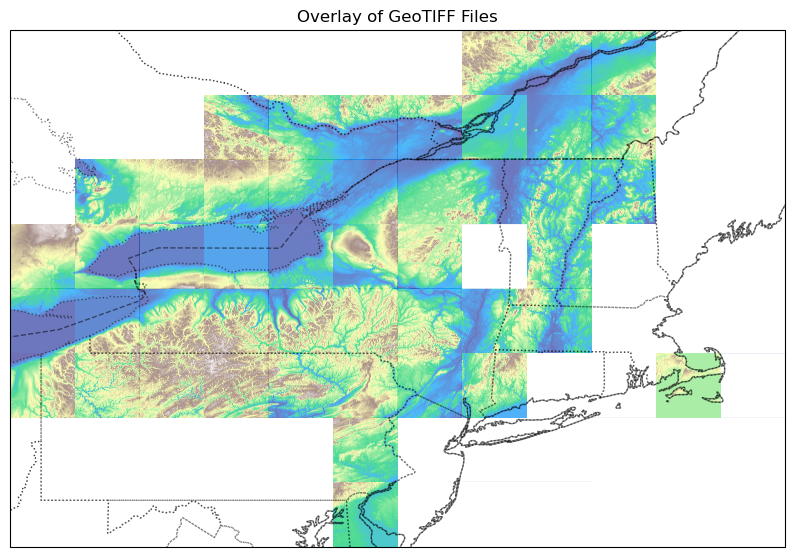

In [1]:
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Directory containing GeoTIFF files
geo_tiff_dir = "../geotiffs"


# Iterate through all files in the directory
geo_tiff_files = [os.path.join(geo_tiff_dir, f) for f in os.listdir(geo_tiff_dir) if f.endswith(".tif")]

# Initialize variables to track the maximum extent
min_x, min_y = float('inf'), float('inf')
max_x, max_y = float('-inf'), float('-inf')

# First pass: Compute the maximum extent across all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Update the bounds
        min_x = min(min_x, src.bounds.left)
        max_x = max(max_x, src.bounds.right)
        min_y = min(min_y, src.bounds.bottom)
        max_y = max(max_y, src.bounds.top)

# Create a Cartopy plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
ax.add_feature(cfeature.BORDERS, linestyle="--", alpha=0.5)
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.STATES, linestyle=":", alpha=0.5)

# Set the computed maximum extent
ax.set_extent([min_x, max_x, min_y, max_y], crs=ccrs.PlateCarree())

# Second pass: Plot all GeoTIFFs
for geo_tiff in geo_tiff_files:
    with rasterio.open(geo_tiff) as src:
        # Read the first band
        data = src.read(1)
        # Get the extent of the GeoTIFF
        extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
        # Plot the GeoTIFF
        ax.imshow(data, transform=ccrs.PlateCarree(), extent=extent, origin='upper', cmap='terrain', alpha=0.7)

# Add title
plt.title("Overlay of GeoTIFF Files")
plt.savefig("../geotiffs/test.png", dpi = 300, bbox_inches='tight')
plt.show()